# DS Methodology : **RNNs** (Recurrent Neural Networks)

- Name: Jiho Kang
- Email Address: 22200022@handong.ac.kr
- GitHub: [hahahohoJIHO](https://github.com/hahahohoJIHO/RNN-Recurrent-Neural-Network-/tree/main)
- Youtube URL: [Understanding Recurrent Neural Networks](https://youtu.be/KZG08AJNrog)

#### **Part 1. Brief background of methodology**

- **Explain the `situation before this methodology was introduced.`**

> Before the advent of Recurrent Neural Networks (RNNs), models such as **traditional feedforward neural networks** were prevalent, yet they struggled with sequential data. These models could process **only fixed-size inputs and outputs** and did not consider the **temporal structure or the order of data**. This **limitation** made them **ineffective** for tasks like time series prediction, **speech recognition**, and **natural language** processing, where understanding the sequence and context is crucial. Traditional models lacked the capability to recall previous inputs, treating each input in isolation which often led to suboptimal performance in tasks requiring memory and contextual awareness.<br><br>
<img src = "https://drive.google.com/uc?id=1mO9FzzAs61K8dMfUrgcj6-tVzP1ZrZAb" height = 200 width = 300> <br>Traditional feedforward neural networks

- **Explain `why this methodology is introduced` and `where it can be used.`**

> RNNs were introduced as a revolutionary solution to overcome the limitations of traditional models in handling sequential data. These networks incorporate an internal memory, which allows them to maintain a hidden state and remember past inputs. This capability is crucial for ***accurately predicting future events in sequences***. RNNs are particularly effective in areas such as ***time series analysis, speech and language processing, and other domains where patterns across time significantly influence the outcomes***. The invention of long short-term memory (LSTM) cells in the 1990s further enhanced RNNs, enabling them to learn long-term dependencies in data sequences, which was a challenge with earlier models. Today, RNNs power many applications including **voice-activated systems** like **Apple’s Siri** and **Google’s voice search**, showcasing their potential in handling real-world sequential data.

#### **Part 2. Key concept of methodology**

- **Explain the `key concept` of the methodology with mathematical equations.**

> The Key concept of RNN is based on their ability to process sequences by **maintaining a hidden state** $h_{t}$, that **captures relevant information from previous time steps**. This state is continuously updated as new inputs $x_{t}$ come in, using a set of weights that govern the influence of the current and past inputs : <br><br> $h_{t} =σ( W_{hh} ⋅h_{t−1} +W_{xh}⋅x_{t} +b_{h})$ <br><br> Here, $W_{hh}$ and $W_{xh}$ represent the weight matrices for the hidden state and input, respectively, $b_{h}$ is the bias, and $\sigma$ denotes the activation function, often a sigmoid or tanh. This updating mechanism allows RNNs to **effectively 'remember'** information over time, which is crucial for sequential data processing.

<img src = "https://drive.google.com/uc?id=1FPihGBmueAZWEVxmXAuxU5Xcw8CGz46W" height = 300 width = 600>


- **Understanding RNN key concepts through a `simple example`**

>To directly understand the **key concept** of RNN, <br>let's use the simple character sequence ***hello*** to predict the next character using RNN. <br> Each character in this sequence is entered sequentially, and the RNN is trained to predict the next character at each time step. <br><br>
>1.   **Data Preparation** <br> Each character in the string "hello" is **mapped to a unique integer** (e.g., **`'h' = 0, 'e' = 1, 'l' = 2, 'o' = 3`**). <br> Because RNNs process **numerical data**, not text. This mapping is arbitrary but must be consistent <br> throughout the data preparation and model training process. <br><br>
>2.   **Model Architecture** <br> The model consists of a **Simple RNN layer** followed by a **Dense layer**. The RNN layer has **`10 hidden`** units, <br> which refers to the **dimensionality of the output space**. This number of hidden units is chosen as a **balance** <br> between **model complexity** and the **simplicity** needed for the small dataset.<br><br>
>3. **Training and Prediction** <br> The model is trained to **`predict the next character`** based on the sequence of previous characters. <br> After training, it predicts the character likely to follow a given input (e.g., **`predicting after 'hell'`**).

```
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# Define the input sequence
sequence = 'hello'

# Map characters to integers
char_to_int = {'h': 0, 'e': 1, 'l': 2, 'o': 3}
int_to_char = {i: c for c, i in char_to_int.items()}

# Prepare the dataset
def prepare_data(seq):
    encoded = [char_to_int[char] for char in seq]
    X, y = encoded[:-1], encoded[1:]
    X = np.reshape(X, (len(X), 1, 1))  # Reshape X to [samples, time steps, features]
    y = tf.keras.utils.to_categorical(y, num_classes=len(char_to_int))
    return X, y

X, y = prepare_data(sequence)

# Build the RNN model
model = Sequential([
    Input(shape=(None, 1)),  # Using Input layer to define input shape
    SimpleRNN(10),  # Removed return_sequences=True
    Dense(len(char_to_int), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Predict the next character
def predict_next_char(model, current_char):
    char_index = char_to_int[current_char]
    input_seq = np.reshape([char_index], (1, 1, 1))
    prediction = model.predict(input_seq)
    return int_to_char[np.argmax(prediction)]

# Test the model by predicting the next character after 'hell'
next_char = predict_next_char(model, 'l')
print("Predicted next character after 'hell':", next_char)
```
1/1 ━━━━━━━━━━━━ 0s 137ms/step <br>
Predicted next character after **`'hell': o`** <br><br>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# Define the input sequence
sequence = 'hello'

# Map characters to integers
char_to_int = {'h': 0, 'e': 1, 'l': 2, 'o': 3}
int_to_char = {i: c for c, i in char_to_int.items()}

# Prepare the dataset
def prepare_data(seq):
    encoded = [char_to_int[char] for char in seq]
    X, y = encoded[:-1], encoded[1:]
    X = np.reshape(X, (len(X), 1, 1))  # Reshape X to [samples, time steps, features]
    y = tf.keras.utils.to_categorical(y, num_classes=len(char_to_int))
    return X, y

X, y = prepare_data(sequence)

# Build the RNN model
model = Sequential([
    Input(shape=(None, 1)),  # Using Input layer to define input shape
    SimpleRNN(10),  # Removed return_sequences=True
    Dense(len(char_to_int), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Predict the next character
def predict_next_char(model, current_char):
    char_index = char_to_int[current_char]
    input_seq = np.reshape([char_index], (1, 1, 1))
    prediction = model.predict(input_seq)
    return int_to_char[np.argmax(prediction)]

# Test the model by predicting the next character after 'hell'
next_char = predict_next_char(model, 'l')
print("Predicted next character after 'hell':", next_char)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted next character after 'hell': o


- **Explain the main `strength` of the methodology.**

> 1. **`Internal Memory and State Updating`** <br> One of the fundamental strengths of RNN lies in their internal **memory** mechanism. At each time step $t$, <br>the **hidden state** $h_{t}$ of the RNN is **updated based on the current input** $x_{t}$ and the **previous hidden state** $h_{t-1}$ : <br><br> $h_{t} =σ( W_{hh} ⋅h_{t−1} +W_{xh}⋅x_{t} +b_{h})$ <br><br>

> 2. **`Backpropagation Through Time`** <br> RNN uniquely adjust their **weights** not only based on the **current input** but also based on the **historical data** they have processed, which is encapsulated in their hidden states. The learning process in RNN involves **backpropagation** through time. During backpropagation through time, **gradients of the loss function $L$** are propagated backward <br>through the network to **update weights** : <br><br> $\frac{ \delta L}{ \delta W}= \sum_{t=1}^T  \frac{ \delta L}{ \delta h_{t}}\frac{ \delta h_{t}}{ \delta W}$ <br><br> $T$ is the length of the input sequence. $W$ represents all weights in the network. <br>The **gradients** with respect to the weights involve summing contributions from all time steps, <br>reflecting how each input at each point in time contributes to the final prediction.<br><br> This process ensures that the network learns from errors at each time step, <br>adjusting its weights to **minimize these errors over time**, thus improving prediction accuracy. <br><br>
<img src = "https://drive.google.com/uc?id=1TOjy0Lf7w3efjKx3w6oZeY-ZRC9cBa-e" height = 300 width = 400><br><img src = "https://drive.google.com/uc?id=1fgKBZgJwPfPbIwUkPFEWEYgnxvvUyrjv" height = 200 width = 400>
<br><br>

> 3. **`Long-Term Dependencies with LSTM`** <br> The extensive memory of RNNs is particularly enhanced by **Long Short-Term Memory** (LSTM) units, <br> which include mechanisms *to avoid the vanishing and exploding gradient problems inherent in basic RNNs.* <br> The LSTM's cell state $C_{t}$ is updated by :<br><br> $C_{t} = f_{t} \odot C_{t-1} + i_{t} \odot  \tilde{C_{t}} $ <br><br> $\tilde{C_{t}}$ is the candidate cell state, calculated based on current input. $i_{t}$ and $f_{t}$ are the input and forget gate activations, respectively, which decide how much of the candidate state to add and how much of the previous state to retain. <br>$\odot$ denotes element-wise multiplication. <br><br> This formulation shows how LSTMs can remember important information **over longer sequences**, <br>crucial for tasks requiring a detailed historical context.




#### **Part 3. Example** <br>RNN for **Voice Recognition**

- **Using a very `simple toy data`, write down a sample code.**

In [127]:
import os
import shutil
import urllib.request
import tarfile
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

# Dataset download URL
DOWNLOAD_URL = "http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz"
# Path to save the dataset
DATASET_PATH = "data/speech_commands"
# Get the current working directory
WORK_DIR = os.getcwd()

def download_and_extract(dataset_url, dest_path):
    # Check if the destination path exists
    if not os.path.exists(dest_path):
        # Create the destination path if it does not exist
        os.makedirs(dest_path, exist_ok=True)
        # Define the path for the downloaded tar file
        tar_path = os.path.join(WORK_DIR, "speech_commands.tar.gz")
        # Download the dataset
        urllib.request.urlretrieve(dataset_url, tar_path)
        # Extract the contents of the tar file
        with tarfile.open(tar_path, "r:gz") as tar:
            tar.extractall(path=dest_path)
        # Remove the downloaded tar file
        os.remove(tar_path)

# Call the function to download and extract the dataset
download_and_extract(DOWNLOAD_URL, DATASET_PATH)

In [128]:
# Check Data
classes = ["yes", "no"]
train_audio_path = os.path.join(DATASET_PATH, "")

labels = [d for d in os.listdir(train_audio_path) if os.path.isdir(os.path.join(train_audio_path, d))]
labels = [label for label in labels if label in classes]
print("Available labels:", labels)

no_of_recordings = []
for label in labels:
    waves = [f for f in os.listdir(os.path.join(train_audio_path, label)) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

Available labels: ['no', 'yes']


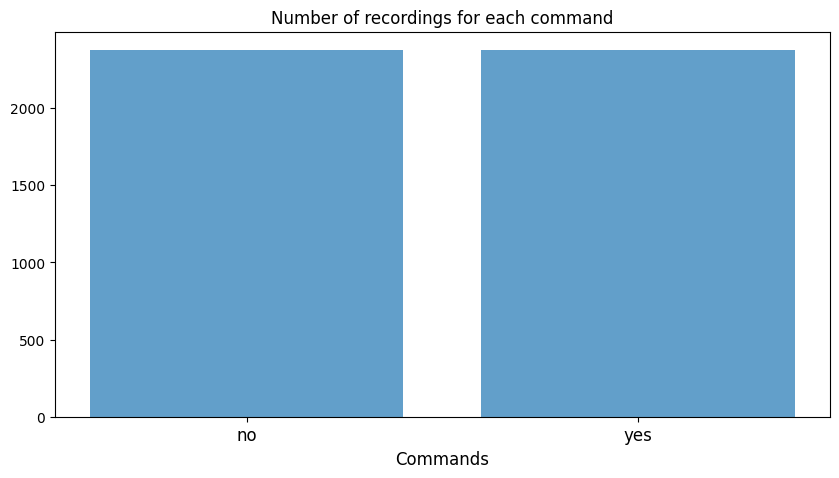

In [129]:
# Visualize the number of samples with a bar graph
plt.figure(figsize=(10, 5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings, align='center', alpha=0.7)
plt.xlabel('Commands', fontsize=12)
plt.xticks(index, labels, fontsize=12)
plt.title('Number of recordings for each command')
plt.show()

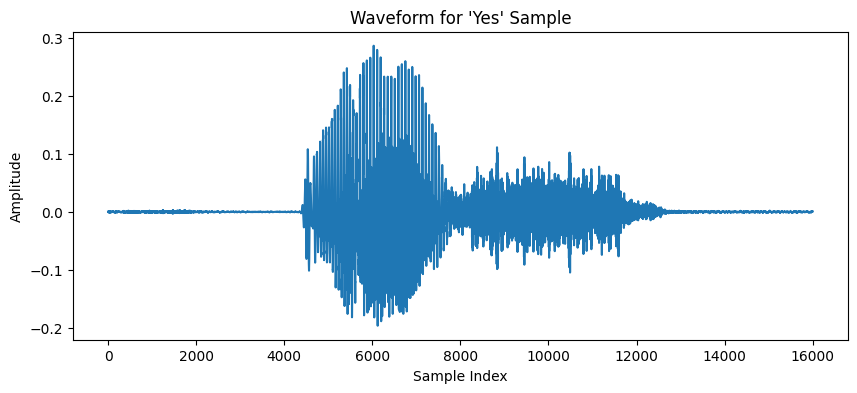

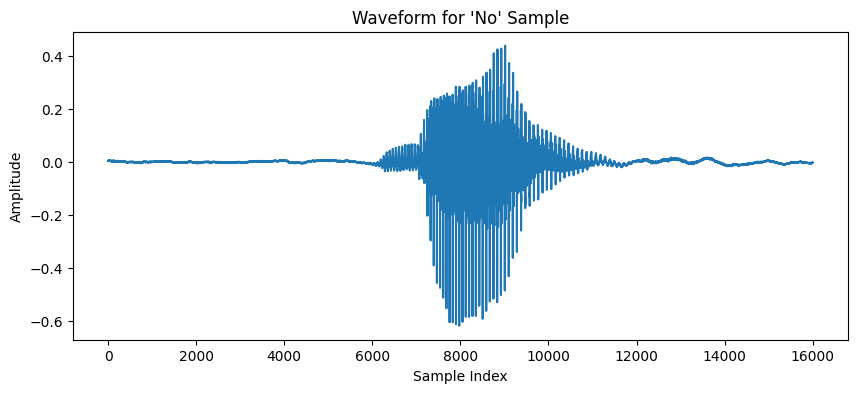

In [126]:
def plot_audio_waveform(audio, title):
    plt.figure(figsize=(10, 4))
    plt.plot(audio)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()

# Plotting 'Yes' audio sample
plot_audio_waveform(yes_audio, "Waveform for 'Yes' Sample")

# Plotting 'No' audio sample
plot_audio_waveform(no_audio, "Waveform for 'No' Sample")

In [130]:
# Load and display an example audio file for the 'yes' command
yes_audio_path = os.path.join(train_audio_path, 'yes/0a7c2a8d_nohash_0.wav')
yes_audio, sr = librosa.load(yes_audio_path, sr=None)
print("Playing 'Yes' audio sample:")
ipd.display(ipd.Audio(yes_audio, rate=sr))

# Load and display an example audio file for the 'no' command
no_audio_path = os.path.join(train_audio_path, 'no/0b40aa8e_nohash_0.wav')
no_audio, sr = librosa.load(no_audio_path, sr=None)
print("Playing 'No' audio sample:")
ipd.display(ipd.Audio(no_audio, rate=sr))

Playing 'Yes' audio sample:


Playing 'No' audio sample:


In [131]:
def extract_features(audio_path, max_pad_len=40):
    try:
        # Load the audio file
        audio, sr = librosa.load(audio_path, sr=None)
        # Extract MFCC features from the audio
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        # Calculate the padding width needed to match the maximum padding length
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        return mfcc
    except Exception as e:
        print("Error encountered while parsing file: ", audio_path)
        return None

# Example MFCC extraction
mfcc_yes = extract_features(yes_audio_path)
mfcc_no = extract_features(no_audio_path)

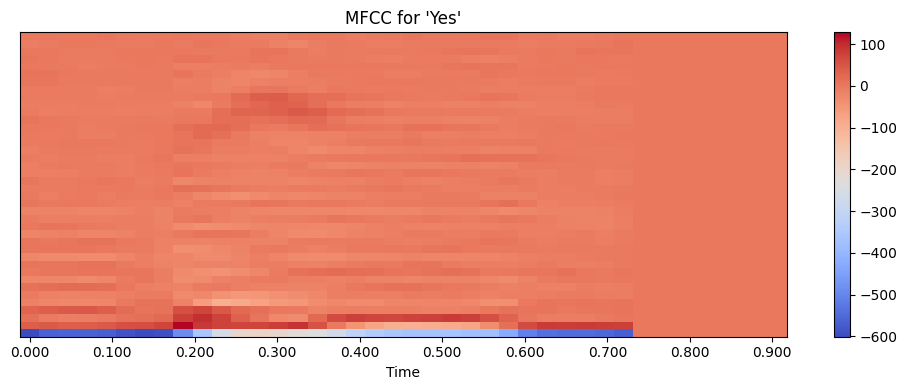

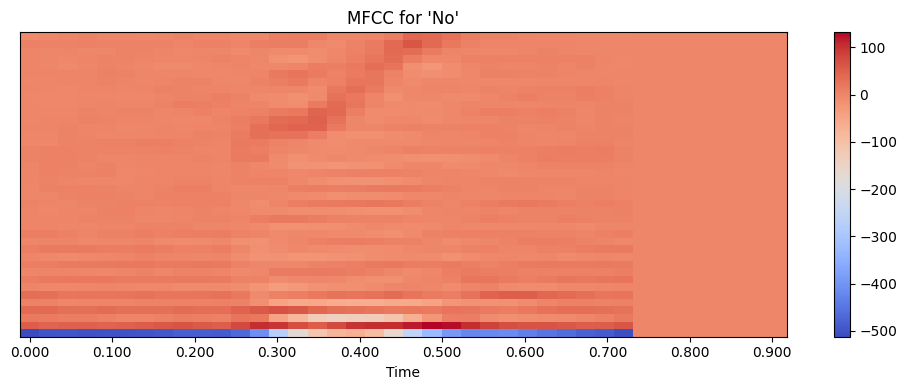

In [133]:
import matplotlib.pyplot as plt
import librosa.display

def plot_mfcc(mfcc, title):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Visualize the MFCC for 'Yes' and 'No' audio samples
plot_mfcc(mfcc_yes, "MFCC for 'Yes'")
plot_mfcc(mfcc_no, "MFCC for 'No'")

In [135]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Prepare the data - 'yes' is 1, 'no' is 0
X = np.array([mfcc_yes.squeeze(), mfcc_no.squeeze()])
y = np.array([1, 0])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.3535 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.0688 - val_accuracy: 1.0000 - val_loss: 0.0177
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0215
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 7.3834e-04 - val_accuracy: 1.0000 - val_loss: 0.0251
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 1.4511e-04 - val_accuracy: 1.0000 - val_loss: 0.0301
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 4.6957e-05 - val_accuracy: 1.0000 - val_loss: 0.0365
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 2.2890e-05 - val_accuracy: 1.0000 - val_loss: 0.0425
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 1.2658e-05 - val_accuracy: 1.00

In [137]:
# Prediction and result visualization
def predict_and_visualize(model, X, y):
    predictions = model.predict(X)
    for i, prediction in enumerate(predictions):
        actual = 'Yes' if y[i] == 1 else 'No'
        predicted = 'Yes' if prediction > 0.5 else 'No'
        print(f"Actual: {actual}, Predicted: {predicted}, Confidence: {prediction[0] * 100:.2f}%")

predict_and_visualize(model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Actual: Yes, Predicted: Yes, Confidence: 94.15%


- **You must present the result, what it means, and how it can be used.**

>*   **RNN Performance `Results`** : <br> The RNN model successfully **reduced the loss** from 1.3535 to 4.8001e-06 during training while achieving **higher accuracy**. After testing, the results demonstrated high accuracy with a test loss of 0.0603. Specifically, the model correctly predicted **'Yes' as 'Yes' with a prediction confidence of 94.15%.**

>*   **What It `Means`** : <br> These results indicate that the RNN model is performing well in recognizing patterns from the input data. The significant **reduction in loss** and the **high accuracy** demonstrate the model's ability to **understand key features in the dataset**, enabling it to make reliable **voice recognition** predictions. With a **prediction confidence of *94.15*%**, we can trust the model's decision-making process.

>*   **Potential `Applications` and `Future Impact`** : <br> Although the example we've worked on uses very simple toy data, enhancing and expanding this RNN model could lead to real-world applications. For example, this technology could evolve into a powerful **digital assistant**, like **Apple's Siri, Samsung's Bixby, or LG's Genie.** These voice-activated assistants can control home appliances, provide **hands-free environments,** and **improve** everyday **convenienc** by responding to user commands. <br><br> In **my capstone project** on developing an LLM for **interactive cultivation systems in plant factories,** integrating speech recognition could be especially beneficial. For scenarios where typing is difficult—such as during physical work or for elderly or disabled users—voice commands would enhance **accessibility.** Even beyond LLM development, voice-activated control could significantly improve **automation in smart farms.** By controlling *irrigation, lighting, ventilation, and nutrient systems* through voice commands, **farm management would become more interactive and efficient,** offering **economic benefits** as well. <br><br> Additionally, this technology holds great promise in other areas, such as **hands-free vehicle control systems,** where drivers could manage various functions using voice commands, increasing both **convenience and safety.** Similarly, in customer service, **interactive voice response (IVR) systems** could use speech recognition to provide more natural and interactive conversations with customers in real time, further improving customer experiences.

#### **References**

*   Vossen, G. (2018). Data mining for Business Analytics: Concepts, techniques and applications in R. Koros Press.
*   What are recurrent neural networks (rnns)?. Built In. (n.d.). https://builtin.com/data-science/recurrent-neural-networks-and-lstm